# Сборный проект

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<hr>

**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<hr>

# Инструкция по выполнению проекта

## Откройте файл с данными и изучите общую информацию

In [146]:
# импортируем все библиотеки, которые нам будут нужны для выполнения исследования

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [147]:
# откроем рабочий файл

try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [148]:
# посмотрим общую информацию о файле

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [149]:
# выведем на экран 5 строчек таблицы

pd.set_option('display.max_columns', 20)
display(df.head(5))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [150]:
# создадим копию датафрейма df

data = df.copy(deep=True)                          

In [151]:
# посчитаем количество пропущенных значений

data.isna().sum().sort_values(ascending=False)  

Critic_Score       8578
Rating             6766
User_Score         6701
Year_of_Release     269
Name                  2
Genre                 2
Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
dtype: int64

In [152]:
# посчитаем количество полных дубликатов

data.duplicated().sum()

0

In [153]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [154]:
# поиск неявных дубликатов
# извлечем из датафрейма только 2 столбца: 'Name', 'Platform'

data_dubl = data[['Name', 'Platform']][data.duplicated(subset=['Name', 'Platform'])] 
data_dubl

,Name,Platform
1591,Need for Speed: Most Wanted,X360
4127,Sonic the Hedgehog,PS3
11715,Need for Speed: Most Wanted,PC
14244,NaN,GEN
16230,Madden NFL 13,PS3


In [155]:
# рассмотрим строки, имеющие дубликаты, по отдельности

data.query('Name == "Need for Speed: Most Wanted" and Platform == "X360"')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T


> год выпуска разный => не дубликат

In [156]:
data.query('Name == "Sonic the Hedgehog" and Platform == "PS3"')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


> нет года выпуска, однако оценки пользователей и критиков, рейтинг совпадают. Вероятнее всего это дубликат

In [157]:
# удалим строки-дубликаты

data = data.drop([1745, 4127]) 

In [158]:
# создадим датафрейм, состоящий из строки, объединяющий данные для дубликатов Sonic the Hedgehog

columns = [
    'Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 
    'EU_sales','JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'
]
info_game = [
    [
        'Sonic the Hedgehog', 'PS3', 2006.0, 
    'Platform', 0.41, 0.54, 0.04, 0.66, 43.0, 4.1, 'E10+'
    ]
]
sonic_the_hedgehog = pd.DataFrame(data=info_game, columns=columns)
sonic_the_hedgehog

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.54,0.04,0.66,43.0,4.1,E10+


In [159]:
# добавим объединенную строку в исходный датафрейм

data = data.append(sonic_the_hedgehog) 

C:\Users\Анна\AppData\Local\Temp\ipykernel_3340\373176480.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(sonic_the_hedgehog)


In [160]:
data.query('Name == "Need for Speed: Most Wanted" and Platform == "PC"')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.0,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.0,0.02,82.0,8.5,T


> год выпуска разный => не дубликат

In [161]:
data[(data['Name'].isna()==True) & (data['Platform'] == "GEN")]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


> нет названия игры, поэтому строки будут удалены на следующих этапах

In [162]:
data.query('Name == "Madden NFL 13" and Platform == "PS3"')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


> год выпуска, оценки пользователей и критиков, рейтинг совпадают, значит можно говорить о том, что это дубликат

In [163]:
# удалим строки-дубликаты

data = data.drop([604, 16230]) 

In [164]:
# создадим датафрейм, состоящий из строки, объединяющий данные для дубликатов Madden NFL 13

columns = [
    'Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 
    'EU_sales','JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'
]
info_game_2 = [
    [
        'Madden NFL 13', 'PS3', 2012.0, 
    'Sports', 2.11, 0.23, 0.0, 0.23, 83.0, 5.5, 'E'
    ]
]
madden_nfl_13 = pd.DataFrame(data=info_game_2, columns=columns)

In [165]:
# добавим объединенную строку в исходный датафрейм

data = data.append(madden_nfl_13) 

C:\Users\Анна\AppData\Local\Temp\ipykernel_3340\1596856024.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(madden_nfl_13)


In [166]:
data = data.reset_index()
data.drop(labels='index', axis='columns', inplace=True)
data.tail(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16708,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16710,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.54,0.04,0.66,43.0,4.1,E10+
16712,Madden NFL 13,PS3,2012.0,Sports,2.11,0.23,0.00,0.23,83.0,5.5,E


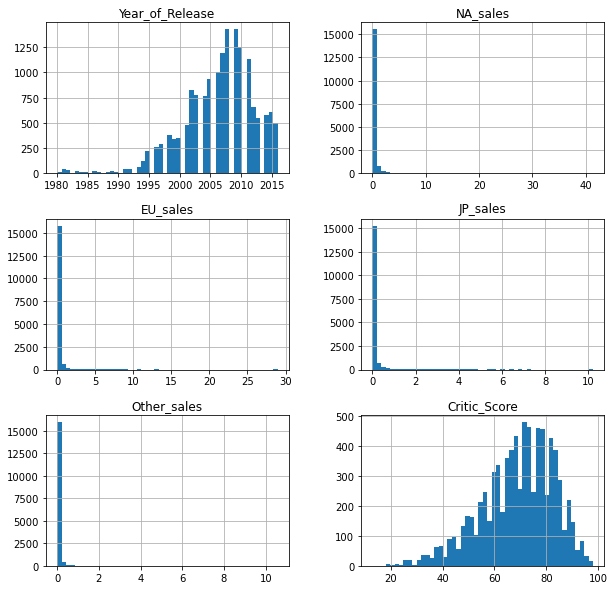

In [167]:
# построим гистограммы для всех столбцов 

data[
    [
        'Year_of_Release', 'NA_sales', 'EU_sales','JP_sales', 
        'Other_sales', 'Critic_Score', 'User_Score', 'Rating'
    ]
].hist(figsize=(10, 10), bins=50)
print(" ")

> Вывод по гистограммам:
1. Больше всего игр было выпущено в 2007-2010 годах
2. Основная часть продаж компьютерных игр не 1 миллиона во всех регионов
3. Большая часть оценок критиков находится в интервале от 60 до 85

> Вывод о проблемах с данными (пропуски, дубликаты, неверный тип данных, странные значения и т.д.):
1. Тип данных для столбцов *year_of_release* - *float* и *user_score* - *object*. Нужно заменить на *int* и *float* соответственно
2. Нужно привести к нижнему регистру названия колонок и все нечисловые значения в столбцах таблицы
3. Имеются пустые значения в столбцах *critic_score, rating, user_score, year_of_release, name, genre*. 
4. Полных дубликатов в датасете нет, однако были обнаружены 2 неявных дубликата; информация была объединена и добавлена в основной датафрейм

## Подготовьте данные
* Замените названия столбцов (приведите к нижнему регистру);
* Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
* Обработайте пропуски при необходимости:
    * Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    * Опишите причины, которые могли привести к пропускам;
    * Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
* Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [168]:
# переведем названия колонок в нижний регистр

data.columns = data.columns.str.lower() 

In [169]:
# содержимое столбцов 'name','platform','genre переведем в нижний регистр

for column in data[['name','platform','genre']]:
    data[column] = data[column].str.lower()

In [170]:
data[data['year_of_release'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
608,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16369,pdc world championship darts 2008,psp,NaN,sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16401,freaky flyers,gc,NaN,racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16444,inversion,pc,NaN,shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16454,hakuouki: shinsengumi kitan,ps3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


> Для некоторых записей, где не указан год выпуска, название игры содержит в себе год. 
> Однако мы не можем быть на 100% уверены, что он совпадает с годом выпсука самой игры

In [171]:
data.shape

(16713, 11)

In [172]:
# создадим новую копию датафрейма

data_dropped = data.copy(deep=True) 

In [173]:
# обработаем пропуски в таблице (столбцы critic_score, rating, user_score, year_of_release, name, genre)

data_dropped.isna().sum().sort_values(ascending=False)

critic_score       8578
rating             6766
user_score         6701
year_of_release     268
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

In [174]:
# убираем строки таблицы, где в столбце year_of_release пропущено значение (268 строк)

data_dropped = data_dropped.dropna(subset=['year_of_release']) 

> При заполнении данных об игре забыли указать год выпуска или точная дата выхода игры точно не определена. Эту информацию заполнить самостоятельно мы не можем => удаляем строки с пропущенным значением года выпуска игры

In [175]:
# удаляем строки, где пропущено название компьютерной игры и жанр

data_dropped = data_dropped.dropna(subset=['name']) 
data_dropped = data_dropped.dropna(subset=['genre']) 

In [176]:
data_dropped.shape

(16443, 11)

In [177]:
# посмотрим кол-во пропусков в датафрейме после удаления строк

data_dropped.isna().sum().sort_values(ascending=False)

critic_score       8461
rating             6676
user_score         6605
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

In [178]:
info_lost_table = data[['year_of_release', 'name', 'genre']].isna().sum().reset_index()

In [179]:
info_lost = info_lost_table[0].sum() - 2 # для 2 строк пропуски были как в столбце 'name', так и в 'genre'

In [180]:
info_lost_percent = info_lost/data_dropped['platform'].count()*100

print(f"Потеря информации за счет удаления строк с пропущенными значениями" \
        f" в столбцах 'year_of_release', 'name', 'genre' составила {info_lost_percent:.1f}%")

Потеря информации за счет удаления строк с пропущенными значениями в столбцах 'year_of_release', 'name', 'genre' составила 1.6%


In [181]:
# переведем тип данных в столбце 'year_of_release' из float в int; в столбце содержатся целочисленные значения - года

data_dropped['year_of_release'] = data_dropped['year_of_release'].astype('int')

In [182]:
# user_score
# tbd - to be determined, to be done. То есть, данные были нарочно не заполнены, так как не определились с рейтингом.

# переведем тип данных в столбце 'user_score' из object в float; в столбце содержатся численные значения
# "tbd" заменяются на NaN

data_dropped['user_score'] = (
    data_dropped.query('user_score.isna() == False and user_score != "tbd"')['user_score']
                .astype('float')
)

In [183]:
data_dropped['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

> в столбце rating есть два значения 'K-A' и 'E10+' - это два значения носящие один и тот же смысл (первоначально "K-A" ("Kids to Adults"), потом было переименовано на E10+),

In [184]:
# переименовываем 'K-A' в 'E10+' для удобного и более точного анализа в дальнейшем

data_dropped['rating'] = data_dropped['rating'].replace('K-A', 'E')

> Общие причины, которые могут привести к пропускам в данных:

* ошибки ввода данных
* сокрытие информации 
* фрод
> В нашем исследовании:
1. *user_score*, *critic_score*:  большое количество пропущенных значений, заполнили медианным. 
<br/>
Причиной отсутствия рейтинга может быть отсутствие оценок в принципе или игры вышли недавно и еще не получили свои оценки.
2. *rating*: рейтинг от организации ESRB. Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию; без этой информации мы не можем присвоить игре возрастную категорию
Т.к. пропущенных значений много, удалить строки мы не можем => оставили пропуски
3. *name*: удалили строки, т.к. без названия самой игры вся остальная информация не имеет смысла.
<br/>
Название могли забыть указать при заведении данных, либо у игры не было утверждено официальное название.
4. *genre*: удалили строки с пустыми значениями. 
<br/>
Пропуски могли возникнуть ввиду того, что при заполнении данных об игре его забыли указать либо жанр видеоигры не определен.

In [185]:
# создадим копию датафрейма data_dropped

data_count = data_dropped.copy(deep=True) 

In [186]:
# посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

data_count['total_sales'] = data_dropped[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

> Вывод:
1. Привели к нижнему регистру названия колонок и содержимое столбцов *name*, *platform*, *genre*
2. Преобразовали данные столбцов *year_of_release* и *user_score* в *int* и *float* соответственно
3. Обработали пропуски в столбцах:
    * *critic_score*, *user_score* - заполнили медианным значением
    * *year_of_release*, *name*, *genre* - удалили строки с пропущенными значениями из датасета
    
В столбце rating оставили пропуски, заполнить их мы не можем

4. Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец *total_sales*

In [187]:
data_count.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales'],
      dtype='object')

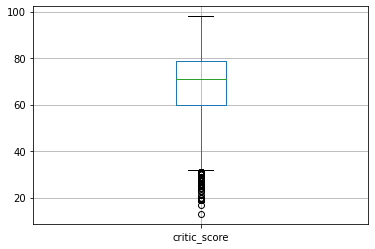

In [188]:
# построим диаграмму размаха для столбца critic_score

data_count.boxplot(column='critic_score')
plt.show()

In [189]:
# посмотрим параметры выборки critic_score

data_count['critic_score'].describe()

count    7982.000000
mean       68.992608
std        13.920049
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

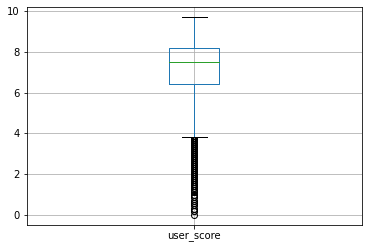

In [190]:
# построим диаграмму размаха для столбца user_score

data_count.boxplot(column='user_score')
plt.show()

In [191]:
# посмотрим параметры выборки user_score

data_count['user_score'].describe()

count    7462.000000
mean        7.126548
std         1.499429
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

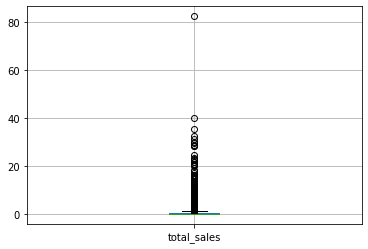

In [192]:
# построим диаграмму размаха для столбца total_sales

data_count.boxplot(column='total_sales')
plt.show()

In [193]:
# посмотрим параметры выборки total_sales

data_count['total_sales'].describe()

count    16443.000000
mean         0.536085
std          1.558845
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

> Вывод:
1. Оценка критиков в среднем составляет 69.0 (медианное значение 71.0)
2. Оценка пользователей в среднем составляет 7.1 (медианное значение 7.5)
3. Среднее значение общих продаж составляет 0.54 миллиона копий (медианное значение 0.17). Наблюдается сильно выбивающееся значение общих продаж - 82.54 миллионов копий (Игра wii sports, платформа wii, 2006 год выпуска)

## Проведите исследовательский анализ данных

**План**:

* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* Соотнесите выводы с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [194]:
# создадим сводную таблицу по количеству игр по годам выпуска

games_years = (
    data_count.pivot_table(
        index='year_of_release', values='name', aggfunc='count'
                            )
                .reset_index()
                .rename(columns={'name':'number'})
)
games_years.tail(10)

,year_of_release,number
27,2007,1197
28,2008,1427
29,2009,1426
30,2010,1255
31,2011,1136
32,2012,652
33,2013,544
34,2014,581
35,2015,606
36,2016,502


In [195]:
# посмотрим, какие игры были выпущены на разных платформах в один год

games_dupl = data_count[data_count.duplicated(subset=['name','year_of_release'])] # 4248 дубликата

In [196]:
# проверим для первой игры в таблице grand theft auto v

data_count.query('name == "grand theft auto v" and year_of_release == 2013')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27


> действительно, игра была выпущена на платформах ps3 и x360 в 2013 году. Т.е. агреция по count() покажет 2, хотя игра вышла всего одна

In [197]:
data_play = data_count.copy(deep=True) # создадим копию датафрейма для "игр" с дубликатами

In [198]:
# удалим из общей таблицы строки с указанием игр, выпуск которых на другой платформе был в том же году

data_play = data_play.drop_duplicates(subset=['name','year_of_release'])

In [199]:
# создадим сводную таблицу по количеству игр по годам выпуска для датасета без дубликатов

games_years_no_dubl = (
    data_play.pivot_table(
        index='year_of_release', values='name', aggfunc='count'
                            )
                .reset_index()
                .rename(columns={'name':'number'})
)
games_years_no_dubl.tail(10)

,year_of_release,number
27,2007,884
28,2008,1039
29,2009,1001
30,2010,900
31,2011,779
32,2012,446
33,2013,335
34,2014,319
35,2015,362
36,2016,297


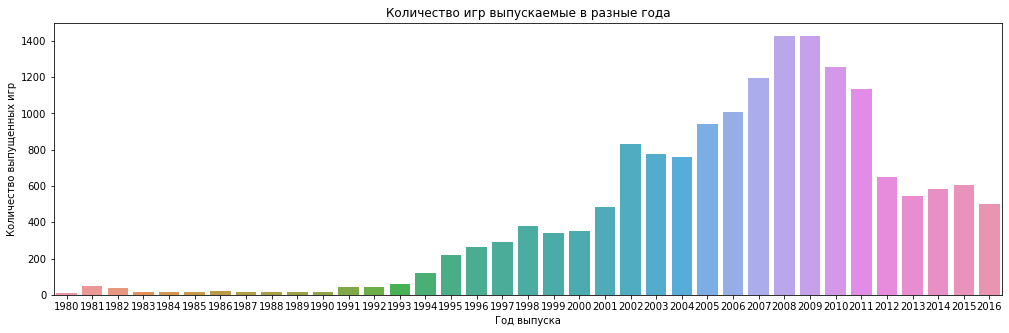

In [200]:
# построим столбчатую диаграмму, чтобы посмотреть, сколько игр выпускалось в разные годы

plt.figure(figsize=(17,5))
sns.barplot(x=games_years['year_of_release'], y=games_years['number'])
plt.title("Количество игр выпускаемые в разные года")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.show()

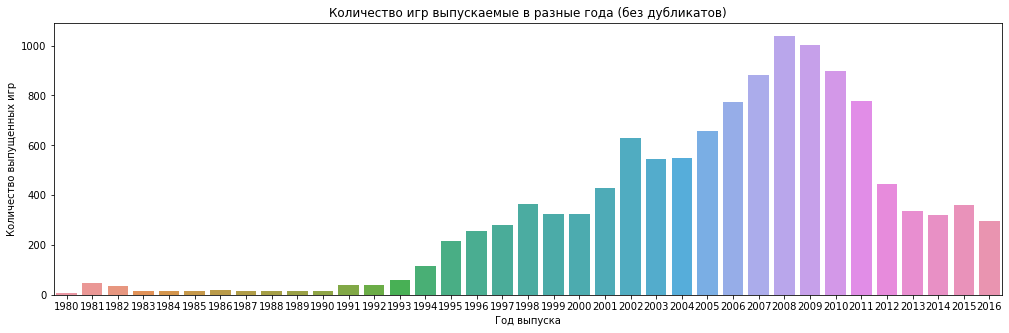

In [201]:
# построим столбчатую диаграмму, чтобы посмотреть, сколько игр выпускалось в разные годы (по датафрейму без дубликатов)

plt.figure(figsize=(17,5))
sns.barplot(x=games_years_no_dubl['year_of_release'], y=games_years_no_dubl['number'])
plt.title("Количество игр выпускаемые в разные года (без дубликатов)")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.show()

> Вывод:
1. В период с 1980 по 1992 года выпускалось очень мало компьютерных игр. 
<br/>
В 1980-х годах, когда появились доступные для широкой публики аркадные автоматы, игровые консоли и домашние компьютеры, компьютерные игры становятся частью поп-культуры. Но эта сфера только развивается.
2. С 1993 начался активный рост количества выпускаемых игр, максимум наблюдается в 2008-2009 годах. Это связано с бурным развитием индустрии.
<br/>
1990-е годы были ознаменованы заметными инновациями в компьютерных играх. Основными достижениями называют переход от растровой графики к полностью полигональному 3D, снижение популярности аркадных игр и появление нескольких новых жанров - шутер от первого лица, стратегия в реальном времени и MMO.
<br/>
В 2003 году мобильный телефон начали впервые позиционировать как игровую платформу.
<br/>
В 2008 году появляются крупные сервисы по продаже мобильных игр: 10 июля – появился App Store, 22 октября — Android Market (в 2012 году переименован в Google Play). Наличие таких огромных интернет магазинов в разы увеличило продажи и подстегнуло развитие мобильных видеоигр. 
3. С 2012 по 2016 год наблюдается резкий спад.
<br/>
Примерно в 2014-2015 году на рынок виртуальных развлечений показала нос технология VR. Visual Reality начала пробиваться сразу по всем фронтам - и на рынок портативных мобильных устройств, и на рынок стационарных пк и игровых консолей. Но у виртуальной реальности возникло множество проблем, среди которых недостаточное количество достойных игровых проектов, поддерживающих технологию VR, высокая стоимость устройств для неё и сырые технологии взаимодействия с виртуальным миром

> Для изучения стоит рассматривать временной промежуток с 1995 по 2016 года.

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [202]:
# создадим сводную таблицу по продажам игр на разных платформах за весь период

platform_on_sales = (
    data_count.pivot_table(index='platform', values='total_sales', aggfunc='sum')
            .sort_values(by='total_sales', ascending=False)
)

In [203]:
platform_on_sales = platform_on_sales.reset_index()

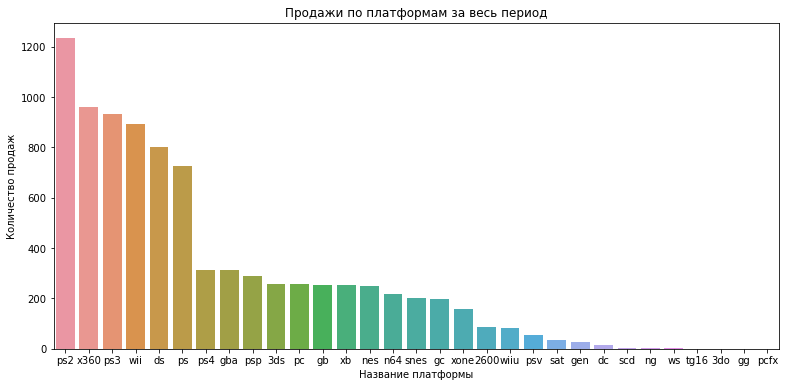

In [204]:
plt.figure(figsize=(13,6))
sns.barplot(x=platform_on_sales['platform'],y=platform_on_sales['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")
plt.show()

> Вывод: самые популярные игровые платформы за весь период это PS2, X360, PS3, WII, DS, PS

In [205]:
top_6 = list(platform_on_sales.head(6)['platform'])

In [206]:
# создадим функцию, которая будет возвращать сводную таблицу и выводить данные с 1995 года

def sale_for_platform_per_year(name, database):
    table_platform = database[(database['platform'] == name) & (database['year_of_release'] >= 1995)]
    total = table_platform.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False).reset_index()
    return total

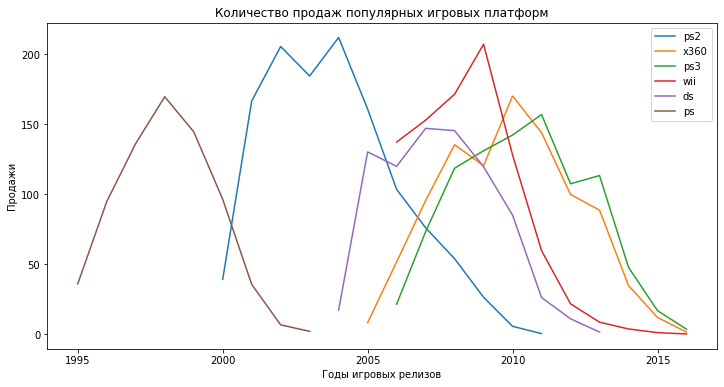

In [207]:
# построим распределение общих продаж с 1995 по 2016 гг. для топ-6 игровых платформ

plt.figure(figsize=(12,6))
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')
for i in top_6:
    sns.lineplot(
        x=sale_for_platform_per_year(i, data_count)['year_of_release'],
        y=sale_for_platform_per_year(i, data_count)['total_sales'], label=i
    )
    plt.legend()

> Вывод: 
1. Самые популярные платформы: ps2, x360, ps3, wii, ds, ps
2. Характерный срок, когда появляются новые и исчезают старые платформы, сотсавляет примерно 10 лет
3. Пик продаж наступает примерно на 5 год после выпуска

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.
> Актуальный период: 2012 - 2016 гг. (где наблюдается спад продаж компьютерных игр)



In [208]:
data_actual = data_count.query('2012 <= year_of_release <= 2016')

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [209]:
# создадим сводную таблицу по продажам игр на разных платформах за 2012-2016 гг

data_actual_pvt = (
        data_actual.pivot_table(index=['platform'], values='total_sales', aggfunc='sum')
                    .reset_index()
                    .sort_values(by='total_sales', ascending=False)
)

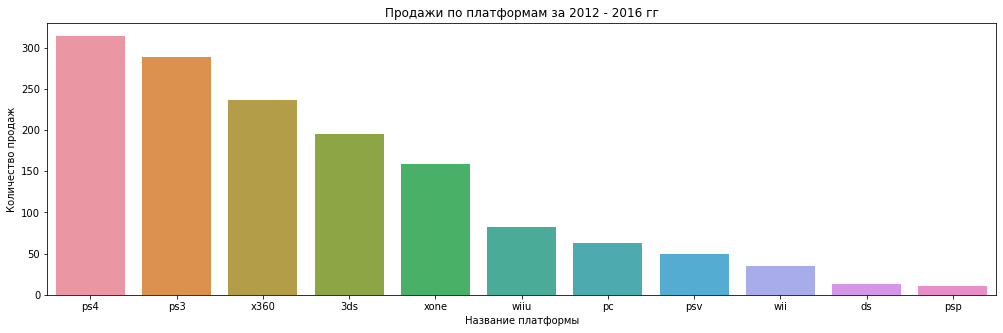

In [210]:
plt.figure(figsize=(17, 5))
sns.barplot(x=data_actual_pvt['platform'], y=data_actual_pvt['total_sales'])
plt.title("Продажи по платформам за 2012 - 2016 гг")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")
plt.show()

> Вывод: самые прибыльные платформы на 2012-2016 гг.: ps4, ps3, x360, 3ds, xone

In [211]:
# создадим сводную таблицу, где будет показана динамика изменения числа общих продаж для каждой платформы за 2012-2015 гг
# 2016 год не включаем в таблицу, поскольку данных за декабрь скорее всего еще нет (прогноз делается в декабре), 
# соответствено данные неполные

d_pvt = (
    data_actual.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')
                .reset_index()
)

In [212]:
d_pvt = d_pvt.query('year_of_release < 2016')

In [213]:
d_pvt

platform,year_of_release,3ds,ds,pc,ps3,ps4,psp,psv,wii,wiiu,x360,xone
0,2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
1,2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2,2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
3,2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14


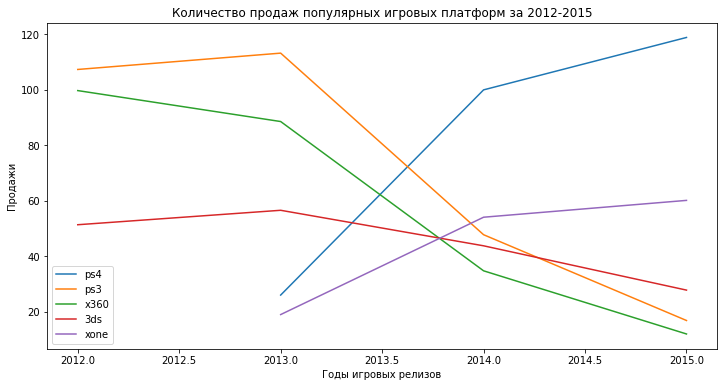

In [214]:
plt.figure(figsize=(12,6))
plt.title('Количество продаж популярных игровых платформ за 2012-2015')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')
sns.lineplot(x=d_pvt['year_of_release'], y=d_pvt['ps4'], label='ps4')
sns.lineplot(x=d_pvt['year_of_release'], y=d_pvt['ps3'], label='ps3')
sns.lineplot(x=d_pvt['year_of_release'], y=d_pvt['x360'], label='x360')
sns.lineplot(x=d_pvt['year_of_release'], y=d_pvt['3ds'], label='3ds')
sns.lineplot(x=d_pvt['year_of_release'], y=d_pvt['xone'], label='xone')
plt.show()

> Вывод:
1. Платформы, продажи которых растут c 2013 г.: ps4, xone
2. Платформы, продажи которых падают c 2013 г.: ps3, x360, 3ds

Таким образом, потенциально прибыльные платформы: **ps4**, **xone**

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [215]:
# сделаем срез датафрейма только для топ-5 платформ по продажам для актуального периода

top5 = list(data_actual_pvt.head(5)['platform'])
data_actual_top5 = data_actual.query('platform in @top5')

In [216]:
for i in top5:
    a = data_actual_top5[data_actual_top5['platform'] == i]['total_sales'].describe()
    print(f'Представление выборки для платформы {i}:')
    print(f'{a}')
    print()

Представление выборки для платформы ps4:
count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

Представление выборки для платформы ps3:
count    492.000000
mean       0.586972
std        1.464141
min        0.010000
25%        0.050000
50%        0.200000
75%        0.610000
max       21.050000
Name: total_sales, dtype: float64

Представление выборки для платформы x360:
count    292.000000
mean       0.810068
std        1.712069
min        0.010000
25%        0.100000
50%        0.310000
75%        0.870000
max       16.270000
Name: total_sales, dtype: float64

Представление выборки для платформы 3ds:
count    396.000000
mean       0.491439
std        1.387161
min        0.010000
25%        0.040000
50%        0.110000
75%        0.312500
max       14.600000
Name: total_sales, dtype: float64

Представление выборки для платформы xone:
count    247.

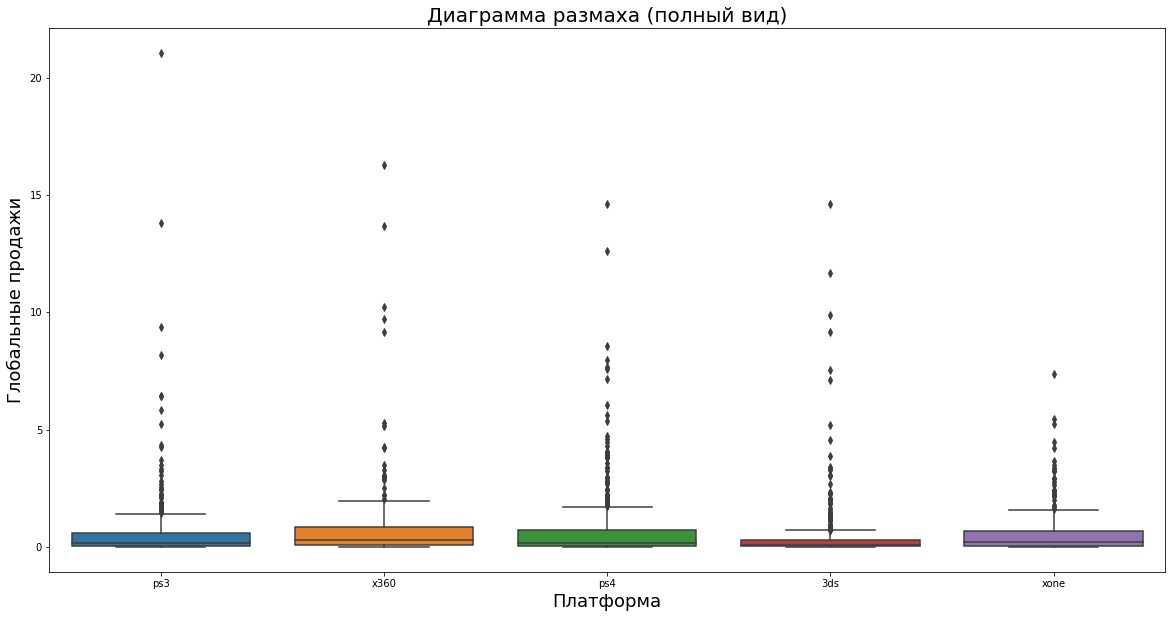

In [217]:
# построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

plt.figure(figsize=(20,10))
data_actual_top5_bplt = sns.boxplot(data=data_actual_top5, x='platform', y='total_sales')
data_actual_top5_bplt.plot()
plt.title('Диаграмма размаха (полный вид)', fontsize=20)
plt.xlabel('Платформа', fontsize=18)
plt.ylabel('Глобальные продажи',fontsize=18)
plt.show()

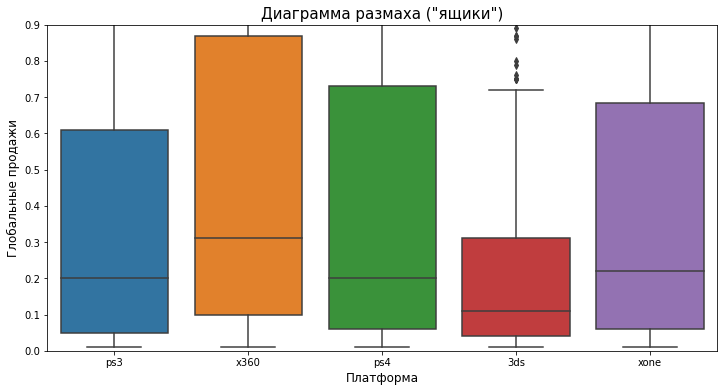

In [218]:
# построим тот же график «ящик с усами», где отображена только нижня часть (сами "ящики") 

plt.figure(figsize=(12,6))
data_actual_top5_bplt = sns.boxplot(data=data_actual_top5, x='platform', y='total_sales')
data_actual_top5_bplt.plot()
data_actual_top5_bplt.set_ylim([0,0.9])
plt.title('Диаграмма размаха ("ящики")', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.show()

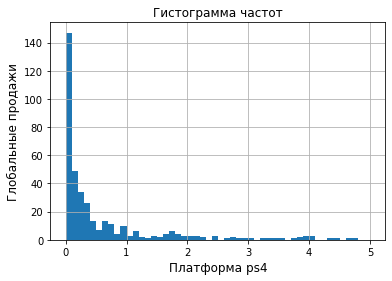

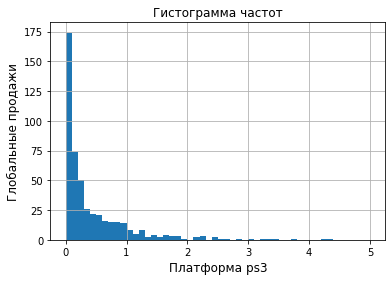

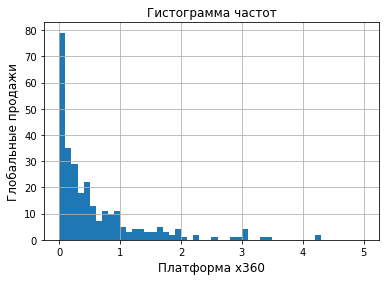

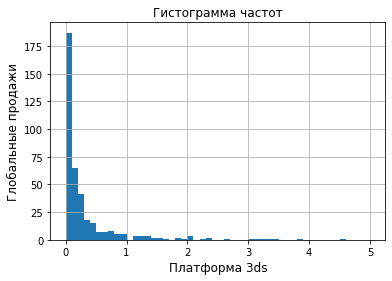

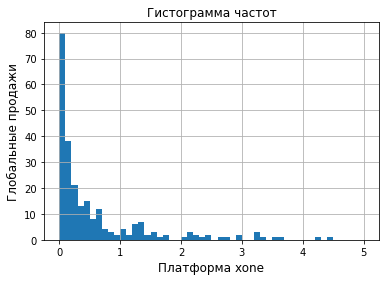

In [219]:
for i in top5:
    data_actual_top5[data_actual_top5['platform'] == i]['total_sales'].hist(range=(0,5), bins=50)
    plt.title('Гистограмма частот', fontsize=12)
    plt.xlabel(f'Платформа {i}', fontsize=12)
    plt.ylabel('Глобальные продажи',fontsize=12)
    plt.show()

> Вывод:
1. Для всех топ-5 платформ наблюдает положительная скошенность набора данных (Q1-median < Q3-median), т.е. среднее значение глобальных продаж больше медианного. Значения отклоняются в сторону больших. 
2. Для платформы x360 наблюдается наибольшее медианное значение, а для 3ds - наименьшее

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [220]:
data_actual_top5.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales'],
      dtype='object')

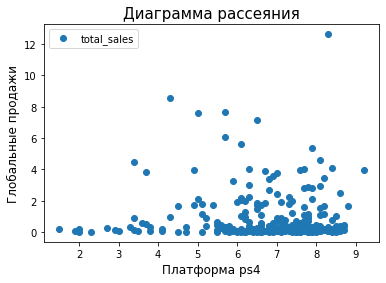

Коэфициент кореляции (продажи-отзывы пользователей) = -0.0320


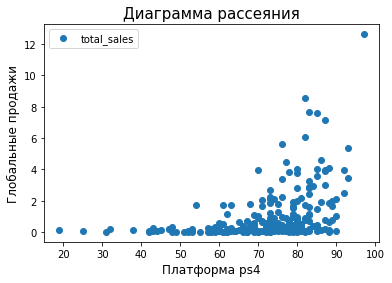

Коэфициент кореляции (продажи-отзывы критиков) = 0.4066


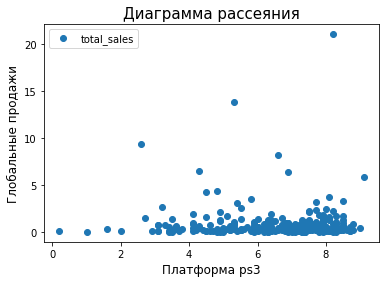

Коэфициент кореляции (продажи-отзывы пользователей) = -0.0062


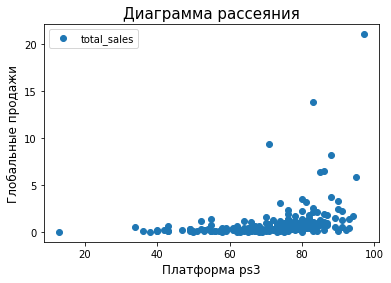

Коэфициент кореляции (продажи-отзывы критиков) = 0.3342


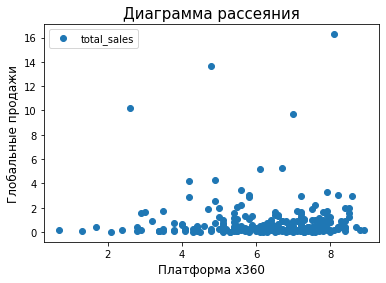

Коэфициент кореляции (продажи-отзывы пользователей) = 0.0062


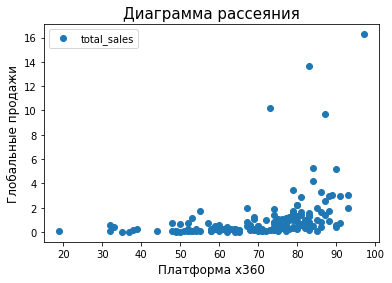

Коэфициент кореляции (продажи-отзывы критиков) = 0.3606


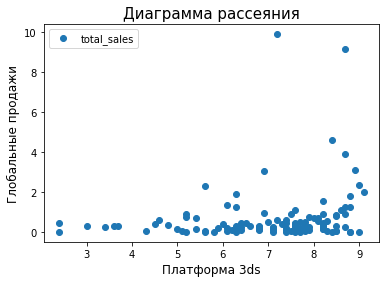

Коэфициент кореляции (продажи-отзывы пользователей) = 0.1976


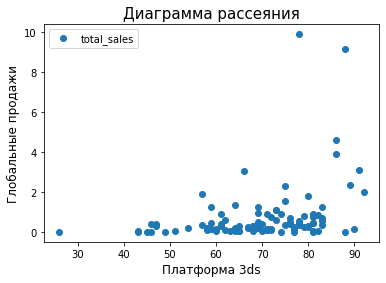

Коэфициент кореляции (продажи-отзывы критиков) = 0.3208


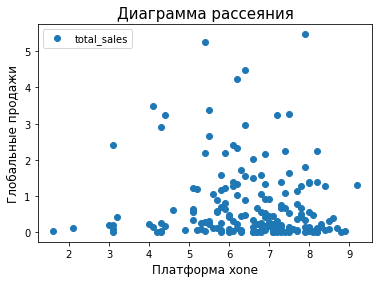

Коэфициент кореляции (продажи-отзывы пользователей) = -0.0689


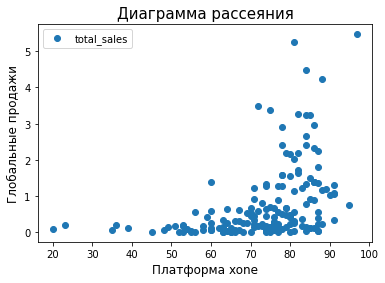

Коэфициент кореляции (продажи-отзывы критиков) = 0.4170


In [221]:
# построим диаграммы рассеяния для выявления корреляции между отзывами и продажами

for i in top5:
    data_actual_top5[data_actual_top5['platform'] == i].plot(x='user_score', y='total_sales', style='o')
    plt.title('Диаграмма рассеяния', fontsize=15)
    plt.xlabel(f'Платформа {i}', fontsize=12)
    plt.ylabel('Глобальные продажи',fontsize=12)
    plt.show()
    corr_i = (
        data_actual_top5[data_actual_top5['platform'] == i]['user_score'].corr(
            data_actual_top5[data_actual_top5['platform'] == i]['total_sales']
        )
    )
    print(f'Коэфициент кореляции (продажи-отзывы пользователей) = {corr_i:.4f}')
    
    data_actual_top5[data_actual_top5['platform'] == i].plot(x='critic_score', y='total_sales', style='o')
    plt.title('Диаграмма рассеяния', fontsize=15)
    plt.xlabel(f'Платформа {i}', fontsize=12)
    plt.ylabel('Глобальные продажи',fontsize=12)
    plt.show()
    corr_i = (
        data_actual_top5[data_actual_top5['platform'] == i]['critic_score'].corr(
            data_actual_top5[data_actual_top5['platform'] == i]['total_sales']
        )
    )
    print(f'Коэфициент кореляции (продажи-отзывы критиков) = {corr_i:.4f}')

> Вывод: отзывы пользователей и критиков по-разному влияют на продажи внутри одной популярной платформы:
1. Оценки пользователей для топ-5 платформ  не имеют линейной связи с общими продажами (коэффициенты корреляции Пирсона около 0)
2. Отзывы критиков, напротив, имею умеренную корреляцию с общими продажами компьютерных игр (коэффициенты корреляции = 0.3 - 0.4)

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [222]:
# создадим сводную таблицу по продажам игр разных жанров за 2012-2016 гг

data_actual_genre = (
    data_actual.pivot_table(index=['genre'], values='total_sales', aggfunc='median')
                .reset_index()
                .sort_values(by='total_sales', ascending=False)
                .rename(columns={'total_sales':'median_total_sales'})
)
data_actual_genre

,genre,median_total_sales
8,shooter,0.440
10,sports,0.240
4,platform,0.210
7,role-playing,0.140
6,racing,0.140
2,fighting,0.130
0,action,0.120
3,misc,0.120
9,simulation,0.120
11,strategy,0.080


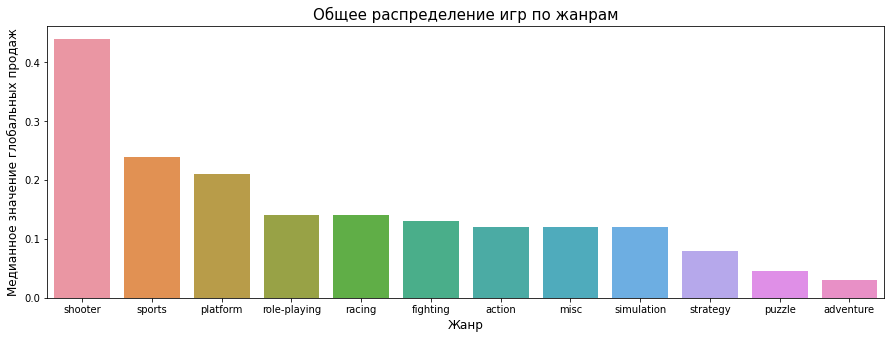

In [223]:
# посмотрим на общее распределение игр по жанрам

plt.figure(figsize=(15, 5))
sns.barplot(x=data_actual_genre['genre'], y=data_actual_genre['median_total_sales'])
plt.title('Общее распределение игр по жанрам', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Медианное значение глобальных продаж',fontsize=12)
plt.show()

> Вывод: 
1. Самыми прибыльными жанрами являются *shooter*, *sports*, *platform* 
2. Самые низкие продажи у жанров *puzzle* и *adventure*

## Составьте портрет пользователя каждого региона

**План**:

Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [224]:
data_actual.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales'],
      dtype='object')

In [225]:
# создадим отдельные переменные для каждого региона (NA, EU, JP)

data_actual_na = data_actual[
    ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'critic_score', 'user_score', 'rating']
]

data_actual_eu = data_actual[
    ['name', 'platform', 'year_of_release', 'genre', 'eu_sales', 'critic_score', 'user_score', 'rating']
]

data_actual_jp = data_actual[
    ['name', 'platform', 'year_of_release', 'genre', 'jp_sales', 'critic_score', 'user_score', 'rating']
]

In [226]:
# создадим сводную таблицу, отображающую общее число продаж игр разных платформ в Северной Америке

data_actual_na_pvt = (
    data_actual_na.pivot_table(index='platform', values='na_sales', aggfunc='sum')
                    .sort_values(by='na_sales', ascending=False)
                    .reset_index()
)

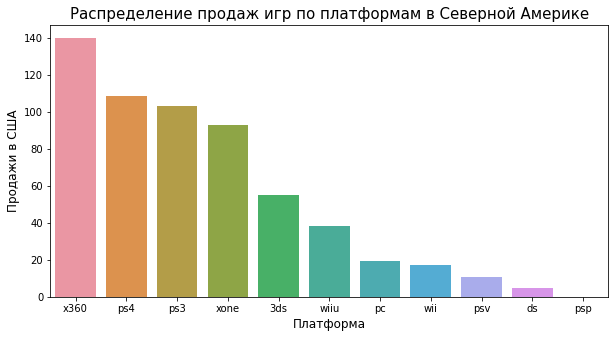

In [227]:
# посмотрим на распределение общего числа продаж игр разных платформ в Северной Америке

plt.figure(figsize=(10, 5))
sns.barplot(x=data_actual_na_pvt['platform'], y=data_actual_na_pvt['na_sales'])
plt.title('Распределение продаж игр по платформам в Северной Америке', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи в США',fontsize=12)
plt.show()

In [228]:
# определим долю продаж для каждой из топ-5 платформ в каждом регионе

top5_na = list(data_actual_na_pvt.head(5)['platform'])
for i in top5_na:
    w_na = data_actual_na_pvt[data_actual_na_pvt['platform']==i]['na_sales'].sum()/data_actual_na_pvt['na_sales'].sum()
    print(f'Доля продаж игр на платформе {i} в Северной Америке = {w_na:.2%}')

Доля продаж игр на платформе x360 в Северной Америке = 23.70%
Доля продаж игр на платформе ps4 в Северной Америке = 18.40%
Доля продаж игр на платформе ps3 в Северной Америке = 17.49%
Доля продаж игр на платформе xone в Северной Америке = 15.76%
Доля продаж игр на платформе 3ds в Северной Америке = 9.36%


> Вывод: 
Топ-5 платформ в Северной Америке: х360, ps4, ps3, xone, 3ds

In [229]:
# создадим сводную таблицу, отображающую общее число продаж игр разных платформ в Европе

data_actual_eu_pvt = (
    data_actual_eu.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .reset_index()
)

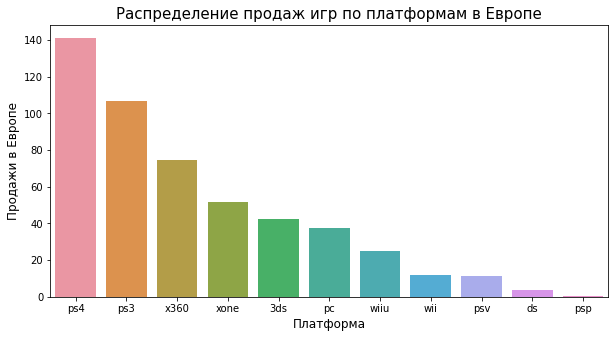

In [230]:
# посмотрим на распределение общего числа продаж игр разных платформ в Европе

plt.figure(figsize=(10, 5))
sns.barplot(x=data_actual_eu_pvt['platform'], y=data_actual_eu_pvt['eu_sales'])
plt.title('Распределение продаж игр по платформам в Европе', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи в Европе',fontsize=12)
plt.show()

In [231]:
top5_eu = list(data_actual_eu_pvt.head(5)['platform'])
for i in top5_eu:
    w_eu = data_actual_eu_pvt[data_actual_eu_pvt['platform']==i]['eu_sales'].sum()/data_actual_eu_pvt['eu_sales'].sum()
    print(f'Доля продаж игр на платформе {i} в Европе = {w_eu:.2%}')

Доля продаж игр на платформе ps4 в Европе = 27.84%
Доля продаж игр на платформе ps3 в Европе = 21.08%
Доля продаж игр на платформе x360 в Европе = 14.70%
Доля продаж игр на платформе xone в Европе = 10.18%
Доля продаж игр на платформе 3ds в Европе = 8.41%


> Вывод: 
Топ-5 платформ в Европе: ps4, ps3, х360, xone, 3ds

In [232]:
# создадим сводную таблицу, отображающую общее число продаж игр разных платформ в Японии

data_actual_jp_pvt = (
    data_actual_jp.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
                    .sort_values(by='jp_sales', ascending=False)
    .reset_index()
)

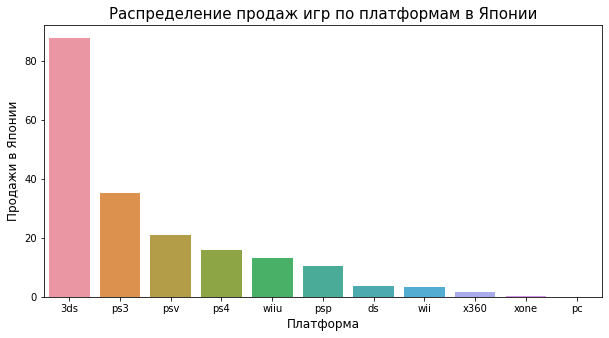

In [233]:
# посмотрим на распределение общего числа продаж игр разных платформ в Японии

plt.figure(figsize=(10, 5))
sns.barplot(x=data_actual_jp_pvt['platform'], y=data_actual_jp_pvt['jp_sales'])
plt.title('Распределение продаж игр по платформам в Японии', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи в Японии',fontsize=12)
plt.show()

In [234]:
top5_jp = list(data_actual_jp_pvt.head(5)['platform'])
for i in top5_jp:
    w_jp = data_actual_jp_pvt[data_actual_jp_pvt['platform']==i]['jp_sales'].sum()/data_actual_jp_pvt['jp_sales'].sum()
    print(f'Доля продаж игр на платформе {i} в Японии = {w_jp:.2%}')

Доля продаж игр на платформе 3ds в Японии = 45.59%
Доля продаж игр на платформе ps3 в Японии = 18.32%
Доля продаж игр на платформе psv в Японии = 10.93%
Доля продаж игр на платформе ps4 в Японии = 8.29%
Доля продаж игр на платформе wiiu в Японии = 6.76%


> Вывод: 
Топ-5 платформ в Японии: 3ds, ps3, psv, ps4, wiiu 

> Вывод:
1. В Северной Америке и Европе игровые платформы, входящие в топ-5, совпадают, однако их распределение по местам отличается:
    В США первое место по продажам занимает х360 (доля продаж 23.7%), в то время как в Европе по продажам лидирует ps4 (27.8%)
2. В Японии топ-5 платформ кардинально отличается от США и Европы: по продажам лидирует платформа 3ds (45.6%)

### Самые популярные жанры (топ-5). Поясните разницу.

In [235]:
# создадим сводную таблицу, отображающую общее число продаж игр разных жанров в Северной Америке

data_actual_na_pvt_genre = (
    data_actual_na.pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .reset_index()
)

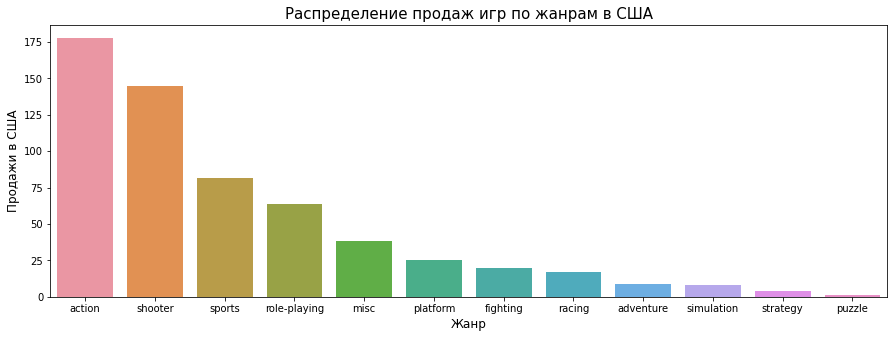

In [236]:
# построим график распределения продаж игр разных жанров в США

plt.figure(figsize=(15, 5))
sns.barplot(x=data_actual_na_pvt_genre['genre'], y=data_actual_na_pvt_genre['na_sales'])
plt.title('Распределение продаж игр по жанрам в США', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Продажи в США',fontsize=12)
plt.show()

> Вывод: в Америке самыми популярными жанрами компьютерных игр являются *action*, *shooter*, *sports*, *role-playing*, *misc*

In [237]:
# создадим сводную таблицу, отображающую общее число продаж игр разных жанров в Европе

data_actual_eu_pvt_genre = (
    data_actual_eu.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .reset_index()
)

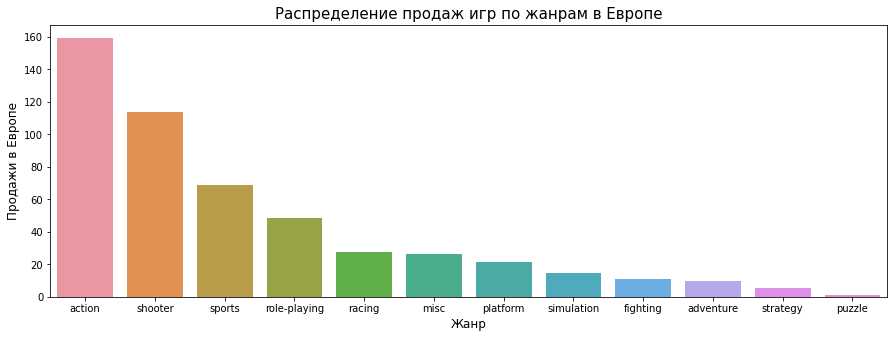

In [238]:
# построим график распределения продаж игр разных жанров в Европе

plt.figure(figsize=(15, 5))
sns.barplot(x=data_actual_eu_pvt_genre['genre'], y=data_actual_eu_pvt_genre['eu_sales'])
plt.title('Распределение продаж игр по жанрам в Европе', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Продажи в Европе',fontsize=12)
plt.show()

> Вывод: в Европе самыми популярными жанрами являются *action*, *shooter*, *sports*, *role-playing*, *racing*

In [239]:
# создадим сводную таблицу, отображающую общее число продаж игр разных жанров в Японии

data_actual_jp_pvt_genre = (
    data_actual_jp.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .reset_index()
)

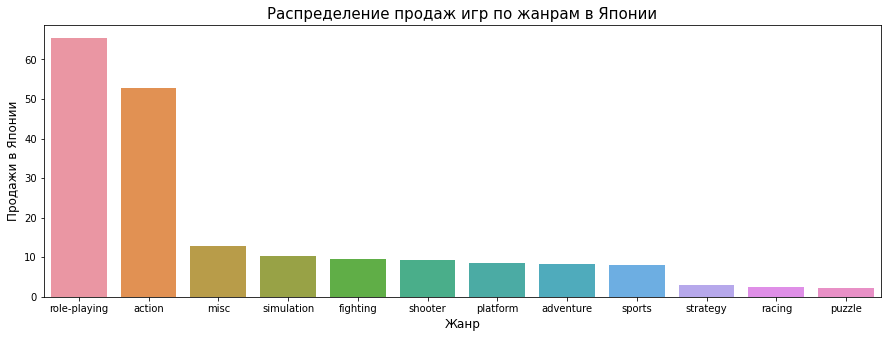

In [240]:
# построим график распределения продаж игр разных жанров в Японии

plt.figure(figsize=(15, 5))
sns.barplot(x=data_actual_jp_pvt_genre['genre'], y=data_actual_jp_pvt_genre['jp_sales'])
plt.title('Распределение продаж игр по жанрам в Японии', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Продажи в Японии',fontsize=12)
plt.show()

> Вывод: в Японии топ-5 жанров компьютерных игр составляют *role-playing*, *action*, *misc*, *simulation*, *fighting*

> Вывод: топ-5 жанров компьютерных игр для стран Европы и США практически не отличаются (наиболее популярны игры жанров *action* и *shooter*, в то время как в Японии самым популярным жанров является *role-playing* и только после него *action*, жанра *shooter* в топ-5 Японии нет. Это может быть объяснено разницей в менталитете жителей этих регионов.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**«E» («Everyone»)** — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. Первоначально "K-A" ("Kids to Adults").

**«E10+» («Everyone 10 and older»)** — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.

**«T» («Teen») — «Подросткам»**: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

**«M» («Mature») — «Для взрослых»**: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.

**«AO» («Adults Only 18+»)** — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. 

In [241]:
# для того, чтобы взять во внимания игры без рейтинга, заполним пропуски в этих столбцах 'no rating' 
# для нас важно, чтобы эти строки считались

data_rating = data_actual.copy(deep=True)

data_rating['rating'] = data_rating['rating'].fillna('no rating')

In [242]:
# создадим отдельные переменные для каждого региона (NA, EU, JP) с заглушкой в колонке "рейтинг"

data_rating_na = data_rating[
    ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'critic_score', 'user_score', 'rating']
]

data_rating_eu = data_rating[
    ['name', 'platform', 'year_of_release', 'genre', 'eu_sales', 'critic_score', 'user_score', 'rating']
]

data_rating_jp = data_rating[
    ['name', 'platform', 'year_of_release', 'genre', 'jp_sales', 'critic_score', 'user_score', 'rating']
]

In [243]:
# создадим сводную таблицу, отображающую рапсределение продаж игр с разным рейтингом в Северной Америке

data_rating_na_pvt = (
    data_rating_na.pivot_table(index='rating', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .reset_index()
)

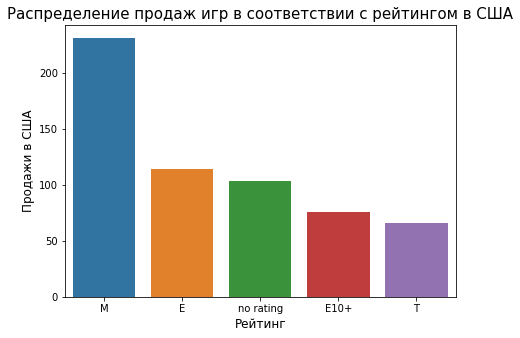

In [244]:
plt.figure(figsize=(7, 5))
sns.barplot(x=data_rating_na_pvt['rating'], y=data_rating_na_pvt['na_sales'])
plt.title('Распределение продаж игр в соответствии с рейтингом в США', fontsize=15)
plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Продажи в США',fontsize=12)
plt.show()

In [245]:
# создадим сводную таблицу, отображающую рапсределение продаж игр с разным рейтингом в Европе

data_rating_eu_pvt = (
    data_rating_eu.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .reset_index()
)

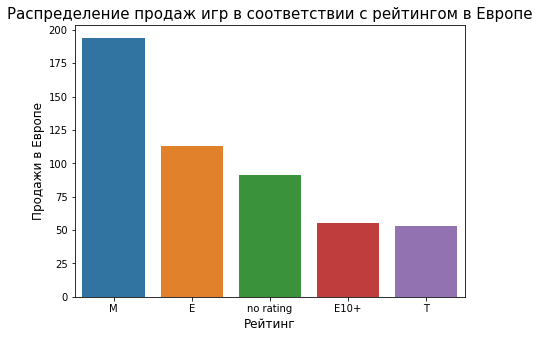

In [246]:
plt.figure(figsize=(7, 5))
sns.barplot(x=data_rating_eu_pvt['rating'], y=data_rating_eu_pvt['eu_sales'])
plt.title('Распределение продаж игр в соответствии с рейтингом в Европе', fontsize=15)
plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Продажи в Европе',fontsize=12)
plt.show()

In [247]:
data_rating_jp_pvt = (
    data_rating_jp.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .reset_index()
)

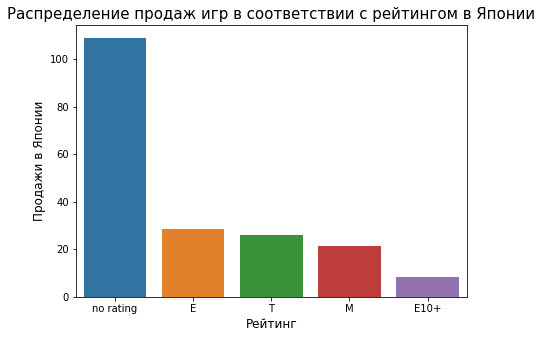

In [248]:
# создадим сводную таблицу, отображающую рапсределение продаж игр с разным рейтингом в Японии

plt.figure(figsize=(7, 5))
sns.barplot(x=data_rating_jp_pvt['rating'], y=data_rating_jp_pvt['jp_sales'])
plt.title('Распределение продаж игр в соответствии с рейтингом в Японии', fontsize=15)
plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Продажи в Японии',fontsize=12)
plt.show()

> Вывод:

В Северной Америке и Европе по количеству продаж лидируют игры с рейтингов "Для взрослых" и "Для всех", а игры с рейтингом "Подросткам" и "Для всех от 10 лет и старше" не популярны.

В Японии основную часть продаж составляют игры без рейтинга. Рейтинг ESRB используется в США, Канаде и Мексике. В Японии используется система CERO. Возможно, это и объясняет лидерство игр без рейтинга ESRB по продажам в стране.

## Проверьте гипотезы
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [249]:
# создадим отдельные срезы по платформам xone и pc по актуальным годам 
data_actual_xone = data_actual.dropna(subset=['user_score', 'critic_score']).query('platform == "xone"')
data_actual_pc = data_actual.dropna(subset=['user_score', 'critic_score']).query('platform == "pc"')

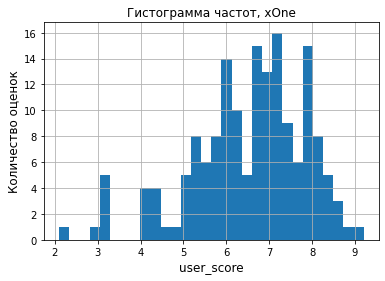

In [250]:
data_actual_xone['user_score'].hist(bins=30)
plt.title('Гистограмма частот, xOne', fontsize=12)
plt.xlabel('user_score', fontsize=12)
plt.ylabel('Количество оценок',fontsize=12)
plt.show()

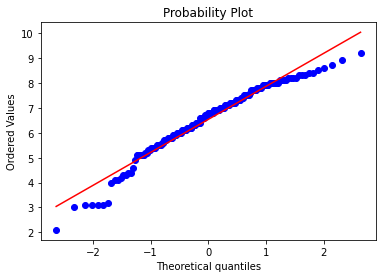

In [251]:
# посмотрим, имеет ли выборка data_actual_xone['user_score'] нормальное распределение
st.probplot(data_actual_xone['user_score'], dist="norm", plot=plt) # смотрим, как много у нас выбивающихся значений
plt.show()

> Выборка имеет распределение, близкое к нормальному

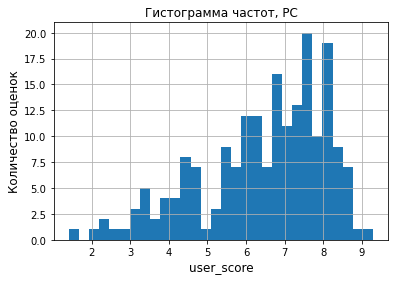

In [252]:
data_actual_pc['user_score'].hist(bins=30)
plt.title('Гистограмма частот, PC', fontsize=12)
plt.xlabel('user_score', fontsize=12)
plt.ylabel('Количество оценок',fontsize=12)
plt.show()

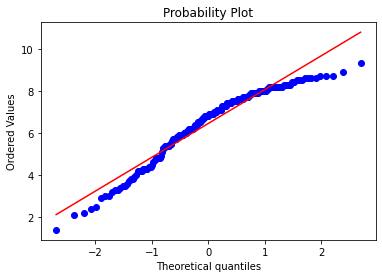

In [253]:
# посмотрим, имеет ли выборка data_actual_pc['user_score'] нормальное распределение
st.probplot(data_actual_pc['user_score'], dist="norm", plot=plt) 
plt.show()

> Выборка имеет распределение, близкое к нормальному

In [254]:
# найдем мат. ожидание, дисперсию и стандарт. отклонение для data_actual_xone['user_score']
mu_xone = data_actual_xone['user_score'].mean()
var_xone = np.var(data_actual_xone['user_score'])
std_xone = np.sqrt(var_xone)
print(f'mu_xone = {mu_xone:.3f}, var_xone = {var_xone:.3f}, std_xone = {std_xone:.3f}')

mu_xone = 6.538, var_xone = 1.786, std_xone = 1.336


In [255]:
# найдем мат. ожидание, дисперсию и стандарт. отклонение для data_actual_pc['user_score']
mu_pc = data_actual_pc['user_score'].mean()
var_pc = np.var(data_actual_pc['user_score'])
std_pc = np.sqrt(var_pc)
print(f'mu_pc = {mu_pc:.3f}, var_pc = {var_pc:.3f}, std_pc = {std_pc:.3f}')

mu_pc = 6.454, var_pc = 2.674, std_pc = 1.635


**Гипотезы:**
<br/>
**H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
<br/>
Н1: Средние пользовательские рейтинги платформ Xbox One и PC не равны**

In [256]:
# проверим гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC
# проверку двусторонней гипотезы осуществим методом t-теста

alpha = .05
result_1 = st.ttest_ind(data_actual_xone['user_score'], data_actual_pc['user_score'], equal_var=False)
print(f'p-значение: {result_1.pvalue:.4f}')

if result_1.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5927
Не получилось отвергнуть нулевую гипотезу


> Вывод: отвергнуть гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC мы не можем (pvalue > 0.05)

In [257]:
# создадим отдельные срезы по жанрам action и sports по актуальным годам 
data_actual_action = data_actual.dropna(subset=['user_score', 'critic_score']).query('genre == "action"')
data_actual_sports = data_actual.dropna(subset=['user_score', 'critic_score']).query('genre == "sports"')

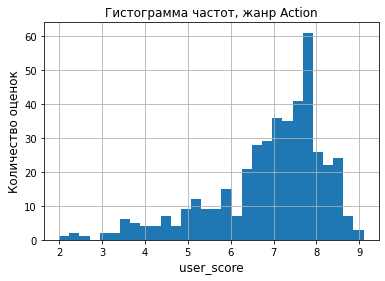

In [258]:
data_actual_action['user_score'].hist(bins=30)
plt.title('Гистограмма частот, жанр Action', fontsize=12)
plt.xlabel('user_score', fontsize=12)
plt.ylabel('Количество оценок',fontsize=12)
plt.show()

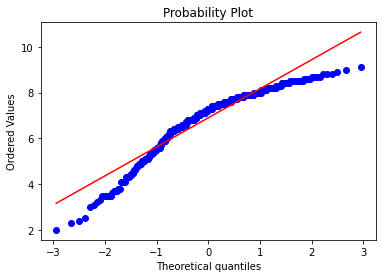

In [259]:
# посмотрим, имеет ли выборка data_actual_action['user_score'] нормальное распределение
st.probplot(data_actual_action['user_score'], dist="norm", plot=plt) 
plt.show()

> Выборка не имеет нормального распределения (слишком большое отклонение от линии тренда)

In [260]:
# найдем мат. ожидание, дисперсию и стандарт. отклонение для data_actual_action['user_score']
mu_action = data_actual_action['user_score'].mean()
var_action = np.var(data_actual_action['user_score'])
std_action = np.sqrt(var_action)
print(f'mu_action = {mu_action:.3f}, var_action = {var_action:.3f}, std_action = {std_action:.3f}')

mu_action = 6.899, var_action = 1.748, std_action = 1.322


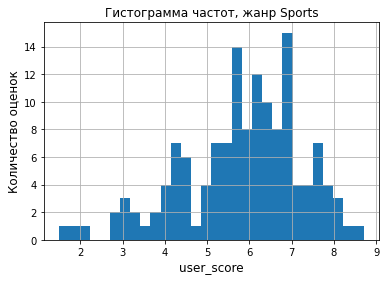

In [261]:
data_actual_sports['user_score'].hist(bins=30)
plt.title('Гистограмма частот, жанр Sports', fontsize=12)
plt.xlabel('user_score', fontsize=12)
plt.ylabel('Количество оценок',fontsize=12)
plt.show()

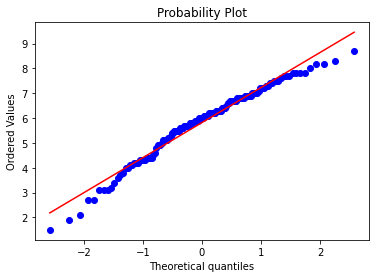

In [262]:
# посмотрим, имеет ли выборка data_actual_action['user_score'] нормальное распределение
st.probplot(data_actual_sports['user_score'], dist="norm", plot=plt) 
plt.show()

> Выборка имеет распределение, близкое к нормальному

In [263]:
# найдем мат. ожидание, дисперсию и стандарт. отклонение для data_actual_action['user_score']
mu_sports = data_actual_sports['user_score'].mean()
var_sports = np.var(data_actual_sports['user_score'])
std_sports = np.sqrt(var_sports)
print(f'mu_sports = {mu_sports:.3f}, var_sports = {var_sports:.3f}, std_sports = {std_sports:.3f}')

mu_sports = 5.822, var_sports = 1.985, std_sports = 1.409


**Гипотезы:**
<br/>
**H0: Средние пользовательские рейтинги жанров Action и Sports равны
<br/>
H1: Средние пользовательские рейтинги жанров Action и Sports разные**

In [264]:
# проверим гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports
# проверку двусторонней гипотезы осуществим методом t-теста

alpha = .05
result_2 = st.ttest_ind(data_actual_action['user_score'], data_actual_sports['user_score'], equal_var=False)
print(f'p-значение: {result_2.pvalue}')

if result_2.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.92641701172798e-14
Отвергаем нулевую гипотезу


> Вывод: гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports неверна (pvalue < 0.05)

# Общий вывод

**В ходе выполнения проекта:**

1. **Найдены и изучены пропущенные значения в данных; там, где это возможно, пропущенные значения были заполнены**
2. **Были отформатированы названия колонок и их содержимое (названия были перевеены в нижний регистр, для некоторых столбцов  был изменен тип данных)**
3. **Проведен исследовательский анализ данных:**
    * Исследована динамика выпуска компьютерных игр с 1980 по 2016 гг: 
        * В период с 1980 по 1993 года выпускалось очень мало компьютерных игр;
        * С 1995 начался активный рост количества выпускаемых игр, максимум наблюдался в 2008-2009 годах;
        * С 2011 по 2016 год наблюдается резкий спад (актуальный период, по которому проводили дальнейшее исследование)
    * Самыми популярными игровыми платформами за весь период являются PS2, X360, PS3, WII, DS, PS (наибольшее количесво продаж)
    * Потенциально прибыльные платформы на 2017 год: Play Station 4, Xbox One
    * Cуществует умеренная линейная зависимость общих продаж и отзывов критиков (коэффициенты корреляции = 0.3 - 0.4)
    * Самыми прибыльными жанрами являются *shooter, sports* и *platform*
4. **Составлен портрет для каждого региона:**
    * В Северной Америке и Европе игровые платформы, входящие в топ-5, совпадают, однако их распределение по местам отличается: В США первое место по продажам занимает х360 (доля продаж 23.7%), в то время как в Европе по продажам лидирует ps4 (27.8%). В Японии топ-5 платформ кардинально отличается от США и Европы: по продажам лидирует платформа 3ds (45.6%)
    * Топ-5 жанров компьютерных игр для стран Европы и США практически не отличаются (наиболее популярны игры жанров action и shooter, в то время как в Японии самым популярным жанров является role-playing и только после него action, жанра shooter в топ-5 Японии нет. Это может объясняться разницей в менталитете жителей этих регионов.
    * В Северной Америке и Европе по количеству продаж лидируют игры с рейтингов "Для взрослых" и "Для всех". В Японии основную долю продаж составляют игры без рейтинга.
4. **Проверены гипотезы:**
    * Не можем отвергнуть гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC (pvalue = 0.5927 > 0.05)
    * Гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports неверна (pvalue = 8.9е-14 < 0.05)
    